In [10]:

from utils import *
from matplotlib import pyplot as plt

In [11]:
#High level todos: 
# - Alternative clustering approaches. (Same plot function with either cluster param that overrides rounding, or additional plots?)
# - Exception handling in the stratified approaches
# - Batching... 

In [12]:
def parse(strat_strat):
    if strat_strat.split("_")[0] == "round":
        return lambda f: round_strata(f,int(strat_strat.split("_")[-1]))
    elif strat_strat == "id":
        return lambda f: f 
    
    

In [13]:
from matplotlib import pyplot as plt
def plot(f,y,ax,title,ns=[33,100,330,1000],k=1000,wr=False,
         strat = ["round_6"],adaptive = ["round_6","round_16"],linestyles=["-","--",":"]
        ):
    base = []
    ppi = []
    
    strat = {key :[] for key in strat}
    adaptive = {key :[] for key in adaptive}
    for n in ns:
        base.append(baseline(f,y,n=n,k=k))
        ppi.append(ppi_k(f,y,n=n,k=k))
        for key in strat.keys():
            strat[key].append(simple_strat_k(parse(key)(f),y,n=n,k=k,with_replacement=wr))
        for key in adaptive.keys():
            adaptive[key].append(adaptive_strat_k(parse(key)(f),y,n=n,k=k,with_replacement=wr))
        
        
    ax.plot(ns,base,color="black") 
    ax.plot(ns,ppi,color="green")
    
    for i,key in enumerate(strat.keys()):
        ax.plot(ns,strat[key],color="orange",linestyle=linestyles[i])
        
    for i,key in enumerate(adaptive.keys()):    
        ax.plot(ns,adaptive[key],color="red",linestyle=linestyles[i])

    ax.set_title(model)
    ax.set_ylim(0,None)

    

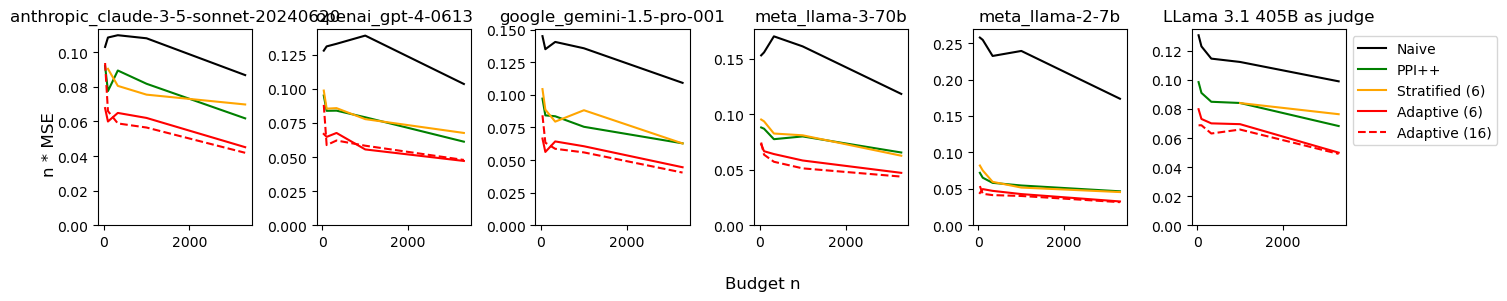

In [15]:
fig,axes = plt.subplots(1,6,figsize=(15,3))

models = ["anthropic_claude-3-5-sonnet-20240620","openai_gpt-4-0613","google_gemini-1.5-pro-001","meta_llama-3-70b","meta_llama-2-7b","llama3.1_rounded"]

for i,model in enumerate(models):
    f,y = make_predictions_judge(model)
    plot(f,y,axes[i],model,k=1000,ns=[33,100,330,1000,3300],strat=["round_6"],adaptive = ["round_6","round_16"])
    
    
plt.title("LLama 3.1 405B as judge")    
plt.legend(["Naive","PPI++","Stratified (6)","Adaptive (6)","Adaptive (16)"],bbox_to_anchor=(1,1))
fig.supxlabel("Budget n")
fig.supylabel("n * MSE")

fig.tight_layout()

plt.show()

In [ ]:
fig,axes = plt.subplots(1,6,figsize=(15,3))

models = ["anthropic_claude-3-5-sonnet-20240620","openai_gpt-4-0613","google_gemini-1.5-pro-001","meta_llama-3-70b","meta_llama-2-7b","llama3.1_rounded"]

for i,model in enumerate(models):
    _,y = make_predictions_judge(model)
    
    #TODO: IMPLEMENT
    f = get_difficulty_pred
    
    plot(f,y,axes[i],model,k=10000,ns=[33,100,330,1000,3300],strat=["id"],adaptive=["id"])
    
    
plt.title("LLama 3.1 70B difficulty estimate")    
plt.legend(["Naive","PPI++","Stratified ","Adaptive"],bbox_to_anchor=(1,1))
fig.supxlabel("Budget n")
fig.supylabel("n * MSE")

fig.tight_layout()

plt.show()

In [ ]:
1.0 is int